In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, pathlib

# pillow image manipulation library
from PIL import Image

# display funtion to present the image inline in Jupyter
from IPython.display import display

# path to figures directory
figuresPath = '/content/drive/MyDrive/Colab Notebooks/figures/'

Mounted at /content/drive


In [ ]:
# Install the library on your environment
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=440a234e501cd4822226cbf727d719e61f4b68cc0ef836b1809707ccd277a085
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/SundayLu17/test/main/'
imageName = 'p1'
imageExt = '.png'
doc = imageName + imageExt
fullURL = baseURL + doc

# Download the file
fileName = wget.download(fullURL, out=figuresPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/figures//p1 (1).png


In [ ]:
dataPath = '/content/drive/MyDrive/Colab Notebooks/data/'
if not(os.path.exists(dataPath)):
    path = pathlib.Path(dataPath)
    path.mkdir(parents=True, exist_ok=True) # Can create the folders in the path if missing. No error if path exists
else:
    print('The data path you selected already exists')

import sqlite3
from sqlite3 import Error
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return conn

dataPath = '/content/drive/MyDrive/Colab Notebooks/data/'
database = dataPath + 'WeatherProjection.db'
conn = create_connection(database)

The data path you selected already exists


# **1. Station Report**


# *a) Please input the name of the province to get some information {province_name}*

In [ ]:
from string import Template
import matplotlib.pyplot as plt
def printProvinceInfo(conn):
    p_name = input("Please input the name of the province to get some information: ")
    """
    Print out the infomation of a station given a province_name
    """
    s_n = []
    r_n = []

    with conn:
        sql = "SELECT station_name, region_name, province_id FROM station_detail WHERE province_id =(select province_id FROM province_detail WHERE province_name=?)"
        cur = conn.cursor()
        cur.execute(sql, [p_name])
        result_set = cur.fetchall()
        if result_set == None:
            print("No such province")
        else:
            headers = ["station_name","region_name"]
            for result in result_set:
              s_n.append(result[0])
              r_n.append(result[1])
            p_id = result[2]

        sql = "SELECT province_id, province_name FROM province_detail WHERE province_id =(select province_id FROM province_detail WHERE province_name=?)+1"
        cur = conn.cursor()
        cur.execute(sql, [p_name])
        result_set2 = cur.fetchall()
        p_id = result_set2[0][0]
        p_name2 = result_set2[0][1]


    print("station name: ", s_n)
    print("region name: ", r_n)
    s ="1.There are {$number} of weather stations in the {$province_name} province. The region of the forecast station is {$region_name}, the name is {$station_name} and the id of this province is {$province_id}"
    tmp = Template(s)
    s_1 = tmp.safe_substitute(province_name = p_name, number = len(result_set), station_name = s_n, region_name = r_n, province_id = p_id)
    print('===================================================================')
    print("There are {} weather stations in the {} province. The stations are {}, which locate in the region of {} respectively.".format(len(result_set),p_name,s_n,r_n))

    s2 ="2.{$province_name} is followed by {$province_name2} and the province id is {$province_id}."
    tmp2 = Template(s2)

# *b) Please input the latitude and longitude for all weather stations within this range*


In [ ]:
from string import Template
def printStation(conn):
    """
    Print out the infomation of a station given a longitude and latitude
    """
    lon_num = float(input("Please input the longitude for all weather stations within this range: "))
    lati_num = float(input("Please input the latitude for all weather stations within this range: "))
    with conn:
      sql = "SELECT longitude,latitude,station_name FROM station_detail WHERE longitude >? AND latitude >?"
      cur = conn.cursor()
      cur.execute(sql, (lon_num, lati_num))
      result_set = cur.fetchall()
      
    s3 ="There are {$number} weather stations within the range of {$longitude}{$latitude}, which are {$station_name}."
    tmp3 = Template(s3)

    s_3 = tmp3.safe_substitute(number = len(result_set), longitude = lon_num, latitude = lati_num, station_name = result_set)
    print('===================================================================')
 
    name_list = []
    data_list = []
    i = 0
    for item in result_set:
        name_list.append(item[1])
        data_list.append(item[2])
    print("There are {} weather stations within the range of {} and {},\n which are {}.".format(len(result_set),lon_num,lati_num,data_list))

# **2.Temperature reports**

#*a)* Please input the year,month and station name to get monthly temperature report.

In [ ]:
def month_temperature(conn):
  year_input=input('please input the year:')
  month_input=input('please input the month:')
  station=input('please input the station name:')
  with conn:
    sql="SELECT avg(Tavg),max(Tavg),min(Tavg) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND month=? AND year=?"
    cur = conn.cursor()
    cur.execute(sql,(station,month_input,year_input))
    result_set = cur.fetchall()
    avg=result_set[0][0]
    highest_avg=result_set[0][1]
    lowest_avg=result_set[0][2]
    sql="SELECT date,month,year,max(Tx) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and month=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station,month_input,year_input))
    Tx_highest = cur.fetchall()
    highest_date=(str(Tx_highest[0][0])+'/'+str(Tx_highest[0][1])+'/'+str(Tx_highest[0][2]))
    highest_Tx=Tx_highest[0][3]
    sql="SELECT date,month,year,min(Tn) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and month=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station,month_input,year_input))
    Tn_lowest = cur.fetchall()
    lowest_date=(str(Tn_lowest[0][0])+'/'+str(Tn_lowest[0][1])+'/'+str(Tn_lowest[0][2]))
    lowest_Tn=Tn_lowest[0][3]
    sql='SELECT count(*) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND month=? AND year=? AND Tx>=32'
    cur=conn.cursor()
    cur.execute(sql,(station,month_input,year_input))
    days = cur.fetchall()
    high_days=days[0][0]
    sql='SELECT count(*) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND month=? AND year=? AND Tn<=20'
    cur=conn.cursor()
    cur.execute(sql,(station,month_input,year_input))
    days_ = cur.fetchall()
    low_days=days_[0][0]
    print('===================================================================')
    print('Here is the monthly temperature report:')
    print('In {}/{}, the average temperature this month was {:.1f} degrees and the highest average temperature was {} degrees and the lowest average temperature was \n{} degrees. On {}, the weather station temperature rose to a maximum of {} degrees this month, while on the contrary, the lowest temperature on \n{} was {} degrees at the weather station. There were {} days with a maximum temperature of 32 degrees or above and {} days with a minimum temperature \nof 20 degrees or below.\n'.format(month_input,year_input,avg,highest_avg,lowest_avg,highest_date,highest_Tx,lowest_date,lowest_Tn,high_days,low_days))
    #plot the average,minimum and maximum temperature of certain month
    sql='SELECT date,Tn,Tx,Tavg FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND month=? AND year=?'
    cur = conn.cursor()
    cur.execute(sql,(station,month_input,year_input))
    month_table = cur.fetchall()
    Tn_list=[]
    Tx_list=[]
    Tavg_list=[]
    month_date=[]
    for i in month_table:
      month_date.append(i[0])
      Tn_list.append(i[1])
      Tx_list.append(i[2])
      Tavg_list.append(i[3])
    plt.plot(month_date,Tn_list,label='min')
    plt.plot(month_date,Tx_list,label='max')
    plt.plot(month_date,Tavg_list,label='avg')
    plt.xlabel('date')
    plt.ylabel('temperature')
    plt.title("Daily temperature")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.show()


#*b)* Please input the year and station name to get annual temperature report.

In [ ]:
#year temperature
def year_temperature(conn):
  year_input=input('please input the year:')
  station=input('please input the station name:')
  with conn:
    sql="SELECT avg(Tavg),max(Tavg),min(Tavg) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND year=?"
    cur = conn.cursor()
    cur.execute(sql,(station,year_input))
    result_set = cur.fetchall()
    avg=result_set[0][0]
    highest_avg=result_set[0][1]
    lowest_avg=result_set[0][2]
    sql="SELECT date,month,year,max(Tx) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station,year_input))
    Tx_highest = cur.fetchall()
    highest_date=(str(Tx_highest[0][0])+'/'+str(Tx_highest[0][1])+'/'+str(Tx_highest[0][2]))
    highest_Tx=Tx_highest[0][3]
    sql="SELECT date,month,year,min(Tn) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station,year_input))
    Tn_lowest = cur.fetchall()
    lowest_date=(str(Tn_lowest[0][0])+'/'+str(Tn_lowest[0][1])+'/'+str(Tn_lowest[0][2]))
    lowest_Tn=Tn_lowest[0][3]
    sql='SELECT count(*) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND year=? AND Tx>=32'
    cur=conn.cursor()
    cur.execute(sql,(station,year_input))
    days = cur.fetchall()
    high_days=days[0][0]
    sql='SELECT count(*) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND year=? AND Tn<=20'
    cur=conn.cursor()
    cur.execute(sql,(station,year_input))
    days_ = cur.fetchall()
    low_days=days_[0][0]
    print('===================================================================')
    print('Here is the yearly temperature report:')
    print('In {}, the average temperature this year was {:.1f} degrees and the highest average temperature was {} degrees and the lowest average temperature \nwas {} degrees. On {}, the weather station temperature rose to a maximum of {} degrees this year, while on the contrary, the lowest temperature \non {} was {} degrees at the weather station. There were {} days with a maximum temperature of 32 degrees or above and {} days with a minimum \ntemperature of 20 degrees or below.\n'.format(year_input,avg,highest_avg,lowest_avg,highest_date,highest_Tx,lowest_date,lowest_Tn,high_days,low_days))
    #plot the average,minimum and maximum temperature of certain year
    sql='SELECT month,avg(Tn),avg(Tx),avg(Tavg) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND year=? GROUP BY month'
    cur = conn.cursor()
    cur.execute(sql,(station,year_input))
    year_table = cur.fetchall()
    Tn_list=[]
    Tx_list=[]
    Tavg_list=[]
    year_month=[]
    for i in year_table:
      year_month.append(i[0])
      Tn_list.append(i[1])
      Tx_list.append(i[2])
      Tavg_list.append(i[3])
    plt.plot(year_month,Tn_list,label='min')
    plt.plot(year_month,Tx_list,label='max')
    plt.plot(year_month,Tavg_list,label='avg')
    plt.xlabel('month')
    plt.ylabel('temperature')
    plt.title("Monthly temperature")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    plt.show()

# **3.Rainfall Report**

#*a) Please input the year, month and station name for the monthly rainfall report.*

In [ ]:
#Monthly rainfall report:
def month_rainfall(conn):
  year_input=input('please input the year:')
  month_input=input('please input the month:')
  station_input=input('please input the station name:')
  with conn:
    sql="SELECT sum(RR),avg(RR),sum(ss),avg(RH_avg) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND month=? AND year=?"
    cur = conn.cursor()
    cur.execute(sql,(station_input,month_input,year_input))
    all = cur.fetchall()
    for result in all:
        sum_RR=result[0]
        avg_RR=result[1]
        sum_ss=result[2]
        avg_RH_avg=result[3]    

    sql="SELECT date,month,year,max(RR) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and month=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station_input,month_input,year_input))
    max_RR = cur.fetchall()
    highest_date=(str(max_RR[0][0])+'/'+str(max_RR[0][1])+'/'+str(max_RR[0][2]))
    highest_maxRR=max_RR[0][3]

    sql="SELECT date,month,year,max(RH_avg) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and month=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station_input,month_input,year_input))
    max_RH_avg = cur.fetchall()
    highest_date_RH=(str(max_RH_avg[0][0])+'/'+str(max_RH_avg[0][1])+'/'+str(max_RH_avg[0][2]))
    highest_maxRH=max_RH_avg[0][3]

    sql="SELECT date,month,year,max(ss) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and month=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station_input,month_input,year_input))
    max_ss = cur.fetchall()
    longest_date_ss=(str(max_ss[0][0])+'/'+str(max_ss[0][1])+'/'+str(max_ss[0][2]))
    longest_maxss=max_ss[0][3]
     
  
    print('===================================================================')
    print('In {}/{}, the total rainfall for this month was {:.1f} mm, the average rainfall for this month was {:.1f} mm,the total duration of sunshine were {} hours，the average humidity was {:.1f}% . \nDuring this month, the date with the highest rainfall was {},reaching {:.1f} mm，the day with highest humidity was {}, with a humidity of {} % , which is closely related to rainfall. And the longest day of sunshine was {}, with a total of {:.1f} hours.'.format(month_input,year_input,sum_RR,avg_RR,sum_ss,avg_RH_avg,highest_date,highest_maxRR,highest_date_RH,highest_maxRH,longest_date_ss,longest_maxss))

 #plot the monthly avgerage humidity, rainfall and duration of sunshine
    sql="SELECT date,month,year,RH_avg,RR,ss FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and month=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station_input,month_input,year_input))
    all_month = cur.fetchall()

    date_list=[]
    RH_list=[]
    RR_list=[]
    ss_list=[]
    
    i=0
    for item in all_month:
        date_list.append(item[0])
        RH_list.append(item[3])
        RR_list.append(item[4])
        ss_list.append(item[5])
    
    plt.figure(figsize=(12, 3))
    plt.subplot(1,3,1)
    plt.plot(date_list,RH_list)
    plt.xlabel('date')
    plt.ylabel('%')

    plt.subplot(1,3,2)
    plt.plot(date_list,RR_list)
    plt.xlabel('date')
    plt.ylabel('mm')

    plt.subplot(1,3,3)
    plt.plot(date_list,ss_list)
    plt.xlabel('date')
    plt.ylabel('hour')

    plt.suptitle('Daily avgerage humidity, rainfall and duration of sunshine')
    
   
    plt.show()

#*b) Please input the year and station name for the annual rainfall report.*

In [ ]:
#Annual rainfall report
def year_rainfall(conn):
  year_input=input('please input the year:')
  station_input=input('please input the station name:')
  with conn:
    sql="SELECT sum(RR),avg(RR),sum(ss),avg(RH_avg) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND year=?"
    cur = conn.cursor()
    cur.execute(sql,(station_input,year_input))
    all = cur.fetchall()
    for result in all:
        sum_RR=result[0]
        avg_RR=result[1]
        sum_ss=result[2]
        avg_RH_avg=result[3]
    

    sql="SELECT month,year,max(RR) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station_input,year_input))
    max_RR = cur.fetchall()
    highest_date=(str(max_RR[0][0])+'/'+str(max_RR[0][1]))
    highest_maxRR=max_RR[0][2]

    sql="SELECT month,year,max(RH_avg) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station_input,year_input))
    max_RH_avg = cur.fetchall()
    highest_date_RH=(str(max_RH_avg[0][0])+'/'+str(max_RH_avg[0][1]))
    highest_maxRH=max_RH_avg[0][2]

    sql="SELECT month,year,max(ss) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station_input,year_input))
    max_ss = cur.fetchall()
    longest_date_ss=(str(max_ss[0][0])+'/'+str(max_ss[0][1]))
    longest_maxss=max_ss[0][2]
     
  
    print('===================================================================')
    print('In {}, the total rainfall for this year was {:.1f} mm, the average rainfall for this year was {:.1f} mm,the total duration of sunshine were {:.1f} hours，the average humidity was {:.1f}% . \nDuring this year, the month with the highest rainfall was {} ,reaching {:.1f} mm，the month with highest humidity was {}, with a humidity of {:.1f} %. And the longest month of sunshine was {}, with a total of {} hours.'.format(year_input,sum_RR,avg_RR,sum_ss,avg_RH_avg,highest_date,highest_maxRR,highest_date_RH,highest_maxRH,longest_date_ss,longest_maxss))

 #plot the annual avgerage humidity, rainfall and duration of sunshine
    sql="SELECT date,month,year,RH_avg,RR,ss FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and year=? GROUP BY month"
    cur=conn.cursor()
    cur.execute(sql,(station_input,year_input))
    all_year = cur.fetchall()

    date_list=[]
    RH_list=[]
    RR_list=[]
    ss_list=[]
    
    i=0
    for item in all_year:
        date_list.append(item[1])
        RH_list.append(item[3])
        RR_list.append(item[4])
        ss_list.append(item[5])
    
    plt.figure(figsize=(12,3))
    plt.subplot(1,3,1)
    plt.plot(date_list,RH_list)
    plt.xlim(0,12) 
    plt.xlabel('month')
    plt.ylabel('%')

    plt.subplot(1,3,2)
    plt.plot(date_list,RR_list)
    plt.xlabel('month')
    plt.ylabel('mm')

    plt.subplot(1,3,3)
    plt.plot(date_list,ss_list)
    plt.xlabel('month')
    plt.ylabel('hour')

    plt.suptitle('Monthly avgerage humidity, rainfall and duration of sunshine')
    
   
    plt.show()

# **4.wind report**

# *a) Please input the year, month and station name for the monthly wind report.*


In [ ]:
# Print a monthly wind report.
def month_wind(conn):
  year_input=input('Please input the year:')
  month_input=input('Please input the month:')
  station_input=input('Please input the station name:')
  with conn:
    sql="SELECT avg(FF_AVG), avg(FF_AVG_F), DDD_X, DDD_CAR, max(FF_X), max(FF_X_F) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND month=? AND year=?"
    cur = conn.cursor()
    cur.execute(sql,(station_input,month_input,year_input))
    all = cur.fetchall()
    for result in all:
        FF_AVG = result[0]
        FF_AVG_F = int(round(result[1],0))
        DDD_X = result[2]
        DDD_CAR = result[3]
        FF_X = result[4] 
        FF_X_F = result[5]
    print('')
    print('In {} of {}, the average wind speed of {} was {:.1f}(m/s) and the wind level was {}.\nBesides, the max wind speed which came from {}°{} was {} (m/s) and the wind level at the time was {}.'.\
    format(month_input, year_input, station_input, FF_AVG, FF_AVG_F, DDD_X, DDD_CAR, FF_X, FF_X_F))
    print('')


# Plot a monthly wind graph.
    sql="SELECT date,month,year,FF_AVG,FF_AVG_F,FF_X,FF_X_F FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and month=? and year=?"
    cur=conn.cursor()
    cur.execute(sql,(station_input,month_input,year_input))
    all_month = cur.fetchall()

    date_list=[]
    FF_AVG_list=[]
    FF_AVG_F_list=[]

    # ignore the null value.
    for item in all_month:
        if item[3] is None:
          continue
        else:
          date_list.append(item[0])
          FF_AVG_list.append(int(item[3]))
          FF_AVG_F_list.append(int(item[4]))
    
    fontdict = {'color': 'black','size': 12} 
    
    plt.figure(figsize=(15, 6))
    plt.subplot(1,2,1)
    plt.scatter(date_list,FF_AVG_list)
    plt.xlabel('date', fontdict=fontdict)
    plt.ylabel('wind speed(m/s)', fontdict=fontdict) 
    plt.tick_params(labelsize=12)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(y_major_locator)


    plt.subplot(1,2,2)
    plt.scatter(date_list,FF_AVG_F_list)
    plt.xlabel('date', fontdict=fontdict)
    plt.ylabel('wind level', fontdict=fontdict)
    plt.tick_params(labelsize=12)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(y_major_locator)

    plt.suptitle('Daily Average Wind Speed and Wind Level', size=20)
    plt.show()
    print('')

    
    date_list1=[]
    FF_X_list=[]
    FF_X_F_list=[]

    for item2 in all_month:
        if item2[5] is None:
          continue
        else:
          date_list1.append(item2[0])
          FF_X_list.append(int(item2[5]))
          FF_X_F_list.append(int(item2[6]))

    plt.figure(figsize=(15, 6))
    plt.subplot(1,2,1)
    plt.scatter(date_list1,FF_X_list)
    plt.xlabel('date', fontdict=fontdict)
    plt.ylabel('wind speed(m/s)', fontdict=fontdict)
    plt.tick_params(labelsize=12)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(y_major_locator)


    plt.subplot(1,2,2)
    plt.scatter(date_list1,FF_X_F_list)
    plt.xlabel('date', fontdict=fontdict)
    plt.ylabel('wind level', fontdict=fontdict) 
    plt.tick_params(labelsize=12)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(y_major_locator)
 

    plt.suptitle('Daily Maximum Wind Speed and Wind Level', size=20)
    
    plt.show()


# *b) Please input the year and station name for the annual wind report.*


In [ ]:
# Print an annual wind report.
def year_wind(conn):
  year_input=input('Please input the year:')
  station_input=input('Please input the station name:')
  with conn:
    sql="SELECT avg(FF_AVG), DDD_X, DDD_CAR, max(FF_X) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? AND year=?"
    cur = conn.cursor()
    cur.execute(sql,(station_input,year_input))
    all = cur.fetchall()
    for result in all:
        FF_AVG = result[0]
        DDD_X = result[1]
        DDD_CAR = result[2]
        FF_X = result[3] 
    print('')
    print('In {}, the average wind speed of {} was {:.1f}(m/s).\nBesides, the max wind speed which came from {}°{} was {} (m/s).'.\
    format(year_input, station_input, FF_AVG, DDD_X, DDD_CAR, FF_X))
    print('')


# Plot an annual wind graph.
    sql="SELECT month,avg(FF_AVG),max(FF_X) FROM climate_data NATURAL JOIN station_detail WHERE station_name=? and year=? GROUP BY month"
    cur=conn.cursor()
    cur.execute(sql,(station_input,year_input))
    all_month = cur.fetchall()

    month_list=[]
    FF_AVG_list=[]

    for item in all_month:
        if item[1] is None:
          continue
        else:
          month_list.append(item[0])
          FF_AVG_list.append(int(item[1]))
    
    fontdict = {'color': 'black','size': 12} 

    plt.figure(figsize=(10, 6))
    plt.plot(month_list,FF_AVG_list)
    plt.xlabel('month',fontdict=fontdict)
    a = range(1,13,1)
    plt.xticks(a)
    plt.ylabel('wind speed(m/s)', fontdict=fontdict)
    plt.tick_params(labelsize=12)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(y_major_locator)

    plt.title('Monthly Average Wind Speed', size=20)
    plt.show()

    print('')
    
    month_list1=[]
    FF_X_list=[]

    for item2 in all_month:
        if item2[2] is None:
          continue
        else:
          month_list1.append(item2[0])
          FF_X_list.append(int(item2[2]))
       

    plt.figure(figsize=(10, 6))
    plt.plot(month_list1,FF_X_list)
    plt.xlabel('month', fontdict=fontdict)
    plt.xticks(a)
    plt.ylabel('wind speed(m/s)', fontdict=fontdict)
    plt.tick_params(labelsize=12)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(y_major_locator)

    plt.title('Monthly Maximum Wind Speed', size=20)
    
    plt.show()



# **option**

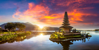


---------------------------
Please choose following option:
1.  Station reports 
2.  Annual/Monthly temperature reports
3.  Annual/Monthly rainfall reports
4.  Annual/Monthly wind report
5.  Insert climate data
6.  exit
---------------------------
Please choose following option:
1.  Wind report for a certain month in a certain year
2.  Wind report in a certain year
3.  exit


KeyboardInterrupt: ignored

In [5]:
def main_picture():
    im = Image.open(fileName)
    size = (200, 50)
#resize
    im.thumbnail(size)
#display an image inline
    display(im)
    print('')

def main_options():
    """ Show the options """
    choices = ["Station reports ", 
               "Annual/Monthly temperature reports",
			         "Annual/Monthly rainfall reports", 
               "Annual/Monthly wind report",
               "Insert climate data",
		           "exit"]

    print("---------------------------")
    print("Please choose following option:")
    print("1. ", choices[0])
    print("2. ", choices[1])
    print("3. ", choices[2])
    print("4. ", choices[3])
    print("5. ", choices[4])
    print("6. ", choices[5])

def station_options():
    choices = ["Station reports for the province", "Station reports for the longitude and the latitude"]
    print("---------------------------")
    print("Please choose following option:")
    print("1. ", choices[0])
    print("2. ", choices[1])

def temperature_options():
    choices=["Temperature report for a certain month in a certain year", "Temperature report in a certain year","exit"]
    print("---------------------------")
    print("Please choose following option:")
    print("1. ", choices[0])
    print("2. ", choices[1])
    print("3. ", choices[2])

def rainfall_options():
    choices=["Rainfall report for a certain month in a certain year", "Rainfall report in a certain year","exit"]
    print("---------------------------")
    print("Please choose following option:")
    print("1. ", choices[0])
    print("2. ", choices[1])
    print("3. ", choices[2])


def wind_options():
    choices=["Wind report for a certain month in a certain year", "Wind report in a certain year","exit"]
    print("---------------------------")
    print("Please choose following option:")
    print("1. ", choices[0])
    print("2. ", choices[1])
    print("3. ", choices[2])

def addclimate(conn):
    """
    Insert data into database
    A sample input is: 1(day),10(month),2021(year),25(Tn),30(Tx),27(Tavg),80(avg humidity),5(rainfall),9(duration of sunshine),6(max wind speed),120(wind direction at maximum speed),3(avg wind speed),S(most wind direction),96001(station_id)
    :return: lastrow id
    """
    values=input('A sample input is: 1(day),10(month),2021(year),25(Tn),30(Tx),27(Tavg),80(avg humidity),5(rainfall),9(duration of sunshine),6(max wind speed),4(max wind force),120(wind direction at maximum speed),3(avg wind speed),2(average wind force),S(most wind direction),96001(station_id)\nPlease input the data:')
    with conn:
        sql = "INSERT INTO climate_data VALUES(?, ?, ?, ?, ?, ?,?,?,?,?,?,?,?,?,?,?)"
        cur = conn.cursor()
        cur.execute(sql, (values[0], values[1], values[2], values[3], values[4], values[5],values[6],values[7],values[8],values[9],values[10],values[11],values[12],values[13],values[14],values[15]))
    print("succeed to add a climate data ")

while True:
    main_picture()
    main_options()
    choice = input('Please enter your option: ')
    if choice == '6':
        conn.close()
        break
    elif choice == '1':
        station_options()
        sta_choice = input('Please enter your option: ')
        if sta_choice =='1':
          printProvinceInfo(conn)
        elif sta_choice=='2':
          printStation(conn)
        elif sta_choice=='3':
          conn.close()
          break  
    elif choice == '2':
        temperature_options()
        temp_choice=input('Please enter your option: ')
        if temp_choice=='1':
          month_temperature(conn)
        elif temp_choice=='2':
          year_temperature(conn)
        elif temp_choice=='3':
          conn.close()
          break
    elif choice == '3':
        rainfall_options()
        rainfall_choice=input('Please enter your option: ')
        if rainfall_choice =='1':
            month_rainfall(conn)
        elif rainfall_choice =='2':
            year_rainfall(conn)
        elif rainfall_choice =='3':
          conn.close()
          break
    elif choice == '4':
        wind_options()
        wind_choice=input('Please enter your option: ')
        if wind_choice =='1':
            month_wind(conn)
        elif wind_choice =='2':
            year_wind(conn)
        elif wind_choice =='3':
          conn.close()
          break
    elif choice=='5':
      addclimate(conn)
    else:
        print("This option is not available")
        continue